In [370]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import statistics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn
import prepare
import acquire

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.


In [371]:
titanic_df = prepare.prep_titanic()
prediction_col = "survived"

titanic_mod_df = titanic_df.drop(columns=["passenger_id","embark_town","sex"])

train_df,test_df,validate_df = prepare.split_function(titanic_mod_df,prediction_col)

baseline_predict = train_df.survived.mode()[0]
(train_df[prediction_col] == baseline_predict).mean()

print(f"{baseline_predict} <--- mode of survived in training data / baseline prediction")
print(f"{(train_df[prediction_col] == baseline_predict).mean() * 100 :.2f}% <--- accuracy of baseline prediciton in training data")


prepared df shape: (891, 9)
train shape: (534, 9)
validate shape: (178, 9)
test shape: (179, 9)
0 <--- mode of survived in training data / baseline prediction
61.61% <--- accuracy of baseline prediciton in training data


In [372]:
def give_it_a_go(X_train,y_train,X_validate,y_validate,depth):
      ''' 
      takes in train and validate sets, with a depth and runs
      basic model info and classification reports
      i was putting in multiple depths and running a lot
      of the same information, this does that so i can play with depth
      '''
      X_train = train_df.drop(columns = [prediction_col])
      y_train = train_df[prediction_col]

      clf = DecisionTreeClassifier(max_depth= depth,random_state= 123, criterion="gini")
      clf = clf.fit(X_train,y_train)

      y_pred = clf.predict(X_train)
      y_pred_proba = clf.predict_proba(X_train)
      clf.classes_mod = str(clf.classes_)

      plt.figure(figsize=(40,20))
      plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_mod, rounded=True)
      plt.show()

      print(f'Accuracy of Decision Tree classifier(gini / {depth}) on training set: ','{:.2f}'
            .format(clf.score(X_train, y_train)))

      labels = sorted(y_train.unique())
      confusion = pd.DataFrame(confusion_matrix(y_train,y_pred),
                                    index=labels,
                                    columns=labels
                                    )
      temp = pd.DataFrame([["TN","FP"],
            ["FN","TP"]])
      info_temp = temp.astype(str) + ":" + confusion.astype(str)
      print(info_temp)
      
      TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()

      print(classification_report(y_train,y_pred), f"---------------{depth} depth set---------------")

      all = TP + FP + FN + TN
      acc = (TP + TN)/all
      TPR = recall = TP / (TP+FN)
      FPR = FP / (FP+TN)
      TNR = (TN / ( TN + FP ))
      FNR = FN / (FN + TP)
      precision = TP / (TP + FP)
      f1_score = 2*(precision*recall)/(precision+recall)
      support_pos = TP+FN
      support_neg = (FP + TN)
      print(round(acc,3),"<--accuracy", \
            round(TPR,3),"<--True positive rate", \
            round(FPR,3), "<--false positive rate/recall", \
            round(TNR,3), "<--true negative rate", \
            round(FNR,3), "<--false negative rate", \
            round(precision,3), "<--precision", \
            round(f1_score,3),"<--f1_score", \
            round(support_pos,3),round(support_neg,3),"<--support pos, support neg")

      print(f"\n \n \n \n \n")

      print(f'Accuracy of Decision Tree classifier (depth {depth}) on validate set: ','{:.2f}'
      .format(clf.score(X_validate, y_validate)))

      y_pred_val = clf.predict(X_validate)
      print(classification_report(y_validate, y_pred_val))



In [373]:
X_train = train_df.drop(columns = [prediction_col])
y_train = train_df[prediction_col]

X_validate = validate_df.drop(columns = [prediction_col])
y_validate = validate_df[prediction_col]

X_test = test_df.drop(columns = [prediction_col])
y_test = test_df[prediction_col]

In [374]:
train_df

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,0,0,7.8958,1,1,0,0
380,1,1,0,0,227.5250,1,0,0,0
492,0,1,0,0,30.5000,1,1,0,1
55,1,1,0,0,35.5000,1,1,0,1
243,0,3,0,0,7.1250,1,1,0,1
...,...,...,...,...,...,...,...,...,...
695,0,2,0,0,13.5000,1,1,0,1
128,1,3,1,1,22.3583,0,0,0,0
636,0,3,0,0,7.9250,1,1,0,1
222,0,3,0,0,8.0500,1,1,0,1


Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [375]:
clf_gini0 = DecisionTreeClassifier(random_state= 123, criterion="gini")
clf_gini0 = clf_gini0.fit(X_train,y_train)
#clf_gini0.classes_ = str(clf_gini0.classes_)
plt.figure(figsize=(20,10))
#plot_tree(clf_gini0, feature_names=X_train.columns, class_names=clf_gini0.classes_, rounded=True)
clf_gini1 = DecisionTreeClassifier(max_depth= 1,random_state= 123, criterion="gini")
clf_gini1 = clf_gini1.fit(X_train,y_train)
#clf_gini1.classes_ = str(clf_gini1.classes_)
plt.figure(figsize=(20,10))
#plot_tree(clf_gini1, feature_names=X_train.columns, class_names=clf_gini1.classes_, rounded=True)
clf_gini3 = DecisionTreeClassifier(max_depth= 3, random_state= 123, criterion="gini")
clf_gini3 = clf_gini3.fit(X_train,y_train)
#clf_gini3.classes_ = str(clf_gini3.classes_)
plt.figure(figsize=(20,10))
#plot_tree(clf_gini3, feature_names=X_train.columns, class_names=clf_gini3.classes_, rounded=True)
clf_gini5 = DecisionTreeClassifier(max_depth= 5,random_state= 123, criterion="gini")
clf_gini5 = clf_gini5.fit(X_train,y_train)
#clf_gini5.classes_ = str(clf_gini5.classes_)
plt.figure(figsize=(20,10))
#plot_tree(clf_gini5, feature_names=X_train.columns, class_names=clf_gini5.classes_, rounded=True)
plt.show()

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [376]:
y_pred_gini0 = clf_gini0.predict(X_train)
y_pred_proba_gini0 = clf_gini0.predict_proba(X_train)
print(y_pred_proba_gini0[0:5],"gini0")
y_pred_gini1 = clf_gini1.predict(X_train)
y_pred_proba_gini1 = clf_gini1.predict_proba(X_train)
print(y_pred_proba_gini1[0:5],"gini1")
y_pred_gini3 = clf_gini3.predict(X_train)
y_pred_proba_gini3 = clf_gini3.predict_proba(X_train)
print(y_pred_proba_gini3[0:5],"gini3")
y_pred_gini5 = clf_gini5.predict(X_train)
y_pred_proba_gini5 = clf_gini5.predict_proba(X_train)
print(y_pred_proba_gini5[0:5],"gini5")

[[0.75 0.25]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.   1.  ]
 [1.   0.  ]] gini0
[[0.81321839 0.18678161]
 [0.24731183 0.75268817]
 [0.81321839 0.18678161]
 [0.81321839 0.18678161]
 [0.81321839 0.18678161]] gini1
[[0.905      0.095     ]
 [0.01785714 0.98214286]
 [0.69105691 0.30894309]
 [0.69105691 0.30894309]
 [0.905      0.095     ]] gini3
[[0.9122807  0.0877193 ]
 [0.         1.        ]
 [0.60240964 0.39759036]
 [0.60240964 0.39759036]
 [0.9122807  0.0877193 ]] gini5


Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [377]:
#Remember that Accuracy is the number of correct predictions 
# over the number of total instances that have been evaluated.
print('Accuracy of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(clf_gini0.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(clf_gini1.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(clf_gini3.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(clf_gini5.score(X_train, y_train)))


Accuracy of Decision Tree classifier(gini / no depth) on training set: 0.95
Accuracy of Decision Tree classifier(gini / depth - 1) on training set: 0.79
Accuracy of Decision Tree classifier(gini / depth - 3) on training set: 0.82
Accuracy of Decision Tree classifier(gini / depth - 5) on training set: 0.83


In [378]:
labels = sorted(y_train.unique())

gini0_confusion = pd.DataFrame(confusion_matrix(y_train,y_pred_gini0),
                                index=labels,
                                columns=labels
                                )
TN0, FP0, FN0, TP0 = confusion_matrix(y_train,y_pred_gini0).ravel()
print(gini0_confusion)
print("^^^0^^^")

gini1_confusion = pd.DataFrame(confusion_matrix(y_train,y_pred_gini1),
                                index=labels,
                                columns=labels
                                )
TN1, FP1, FN1, TP1 = confusion_matrix(y_train,y_pred_gini1).ravel()
print(gini1_confusion)
print("^^^1^^^")

gini3_confusion = pd.DataFrame(confusion_matrix(y_train,y_pred_gini3),
                                index=labels,
                                columns=labels
                                )
TN3, FP3, FN3, TP3 = confusion_matrix(y_train,y_pred_gini3).ravel()
print(gini3_confusion)
print("^^^3^^^")

gini5_confusion = pd.DataFrame(confusion_matrix(y_train,y_pred_gini5),
                                index=labels,
                                columns=labels
                                )
TN5, FP5, FN5, TP5 = confusion_matrix(y_train,y_pred_gini5).ravel()
print(gini5_confusion)
print("^^^5^^^")

     0    1
0  327    2
1   27  178
^^^0^^^
     0    1
0  283   46
1   65  140
^^^1^^^
     0    1
0  295   34
1   63  142
^^^3^^^
     0    1
0  322    7
1   82  123
^^^5^^^


In [379]:
print(classification_report(y_train,y_pred_gini0), "---------------no depth set---------------")

print(classification_report(y_train,y_pred_gini1), "---------------1 depth---------------")

print(classification_report(y_train,y_pred_gini3), "---------------3 depth---------------")

print(classification_report(y_train,y_pred_gini5), "---------------5 depth---------------")



              precision    recall  f1-score   support

           0       0.92      0.99      0.96       329
           1       0.99      0.87      0.92       205

    accuracy                           0.95       534
   macro avg       0.96      0.93      0.94       534
weighted avg       0.95      0.95      0.94       534
 ---------------no depth set---------------
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       329
           1       0.75      0.68      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534
 ---------------1 depth---------------
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80    

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [380]:
print('Accuracy of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(clf_gini0.score(X_train, y_train)))
print('True Positive/Recall of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(TP0/(TP0+FN0)))
print('False Positive/Fall-out of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(FP0/(FP0+TN0)))
print('True Negative/Specificity of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(TN0/(TN0+FP0)))
print('False Negative/Miss of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(FN0/(FN0+TP0)))
print('Precision/PPV of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(TP0/(TP0+FP0)))
print()
print('Accuracy of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(clf_gini1.score(X_train, y_train)))
print('True Positive/Recall of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(TP1/(TP1+FN1)))
print('False Positive/Fall-out of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(FP1/(FP1+TN1)))
print('True Negative/Specificity of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(TN1/(TN1+FP1)))
print('False Negative/Miss of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(FN1/(FN1+TP1)))
print('Precision/PPV of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(TP1/(TP1+FP1)))
print()

print('Accuracy of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(clf_gini3.score(X_train, y_train)))
print('True Positive/Recall of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(TP3/(TP3+FN3)))
print('False Positive/Fall-out of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(FP3/(FP3+TN3)))
print('True Negative/Specificity of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(TN3/(TN3+FP3)))
print('False Negative/Miss of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(FN3/(FN3+TP3)))
print('Precision/PPV of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(TP3/(TP3+FP3)))
print()

print('Accuracy of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(clf_gini5.score(X_train, y_train)))
print('True Positive/Recall of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(TP5/(TP5+FN5)))
print('False Positive/Fall-out of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(FP5/(FP5+TN5)))
print('True Negative/Specificity of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(TN5/(TN5+FP5)))
print('False Negative/Miss of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(FN5/(FN5+TP5)))
print('Precision/PPV of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(TP5/(TP5+FP5)))
print()

Accuracy of Decision Tree classifier(gini / no depth) on training set: 0.95
True Positive/Recall of Decision Tree classifier(gini / no depth) on training set: 0.87
False Positive/Fall-out of Decision Tree classifier(gini / no depth) on training set: 0.01
True Negative/Specificity of Decision Tree classifier(gini / no depth) on training set: 0.99
False Negative/Miss of Decision Tree classifier(gini / no depth) on training set: 0.13
Precision/PPV of Decision Tree classifier(gini / no depth) on training set: 0.99

Accuracy of Decision Tree classifier(gini / depth - 1) on training set: 0.79
True Positive/Recall of Decision Tree classifier(gini / depth - 1) on training set: 0.68
False Positive/Fall-out of Decision Tree classifier(gini / depth - 1) on training set: 0.14
True Negative/Specificity of Decision Tree classifier(gini / depth - 1) on training set: 0.86
False Negative/Miss of Decision Tree classifier(gini / depth - 1) on training set: 0.32
Precision/PPV of Decision Tree classifier(g

Which model performs better on your in-sample data?
 - "no depth model, high likelyhood of overfitting in validation though"


Which model performs best on your out-of-sample data, the validate set?

In [381]:
print('Accuracy of Decision Tree classifier (gini0) on validate set: {:.2f}'
     .format(clf_gini0.score(X_validate, y_validate)))
print('Accuracy of Decision Tree classifier (gini1) on validate set: {:.2f}'
     .format(clf_gini1.score(X_validate, y_validate)))
print('Accuracy of Decision Tree classifier (gini3) on validate set: {:.2f}'
     .format(clf_gini3.score(X_validate, y_validate)))
print('Accuracy of Decision Tree classifier (gini5) on validate set: {:.2f}'
     .format(clf_gini5.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier (gini0) on validate set: 0.74
Accuracy of Decision Tree classifier (gini1) on validate set: 0.78
Accuracy of Decision Tree classifier (gini3) on validate set: 0.79
Accuracy of Decision Tree classifier (gini5) on validate set: 0.74


In [382]:
# Produce y_predictions that come from the X_validate
y_pred_gini0_val = clf_gini0.predict(X_validate)
# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred_gini0_val))

y_pred_gini1_val = clf_gini1.predict(X_validate)
print(classification_report(y_validate, y_pred_gini1_val))

y_pred_gini3_val = clf_gini3.predict(X_validate)
print(classification_report(y_validate, y_pred_gini3_val))

y_pred_gini5_val = clf_gini5.predict(X_validate)
print(classification_report(y_validate, y_pred_gini5_val))


              precision    recall  f1-score   support

           0       0.79      0.79      0.79       110
           1       0.66      0.66      0.66        68

    accuracy                           0.74       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.74      0.74      0.74       178

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.71      0.69      0.70        68

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.78      0.77       178

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.75      0.68      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178

              preci

the model with a depth of 3
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.75      0.68      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178

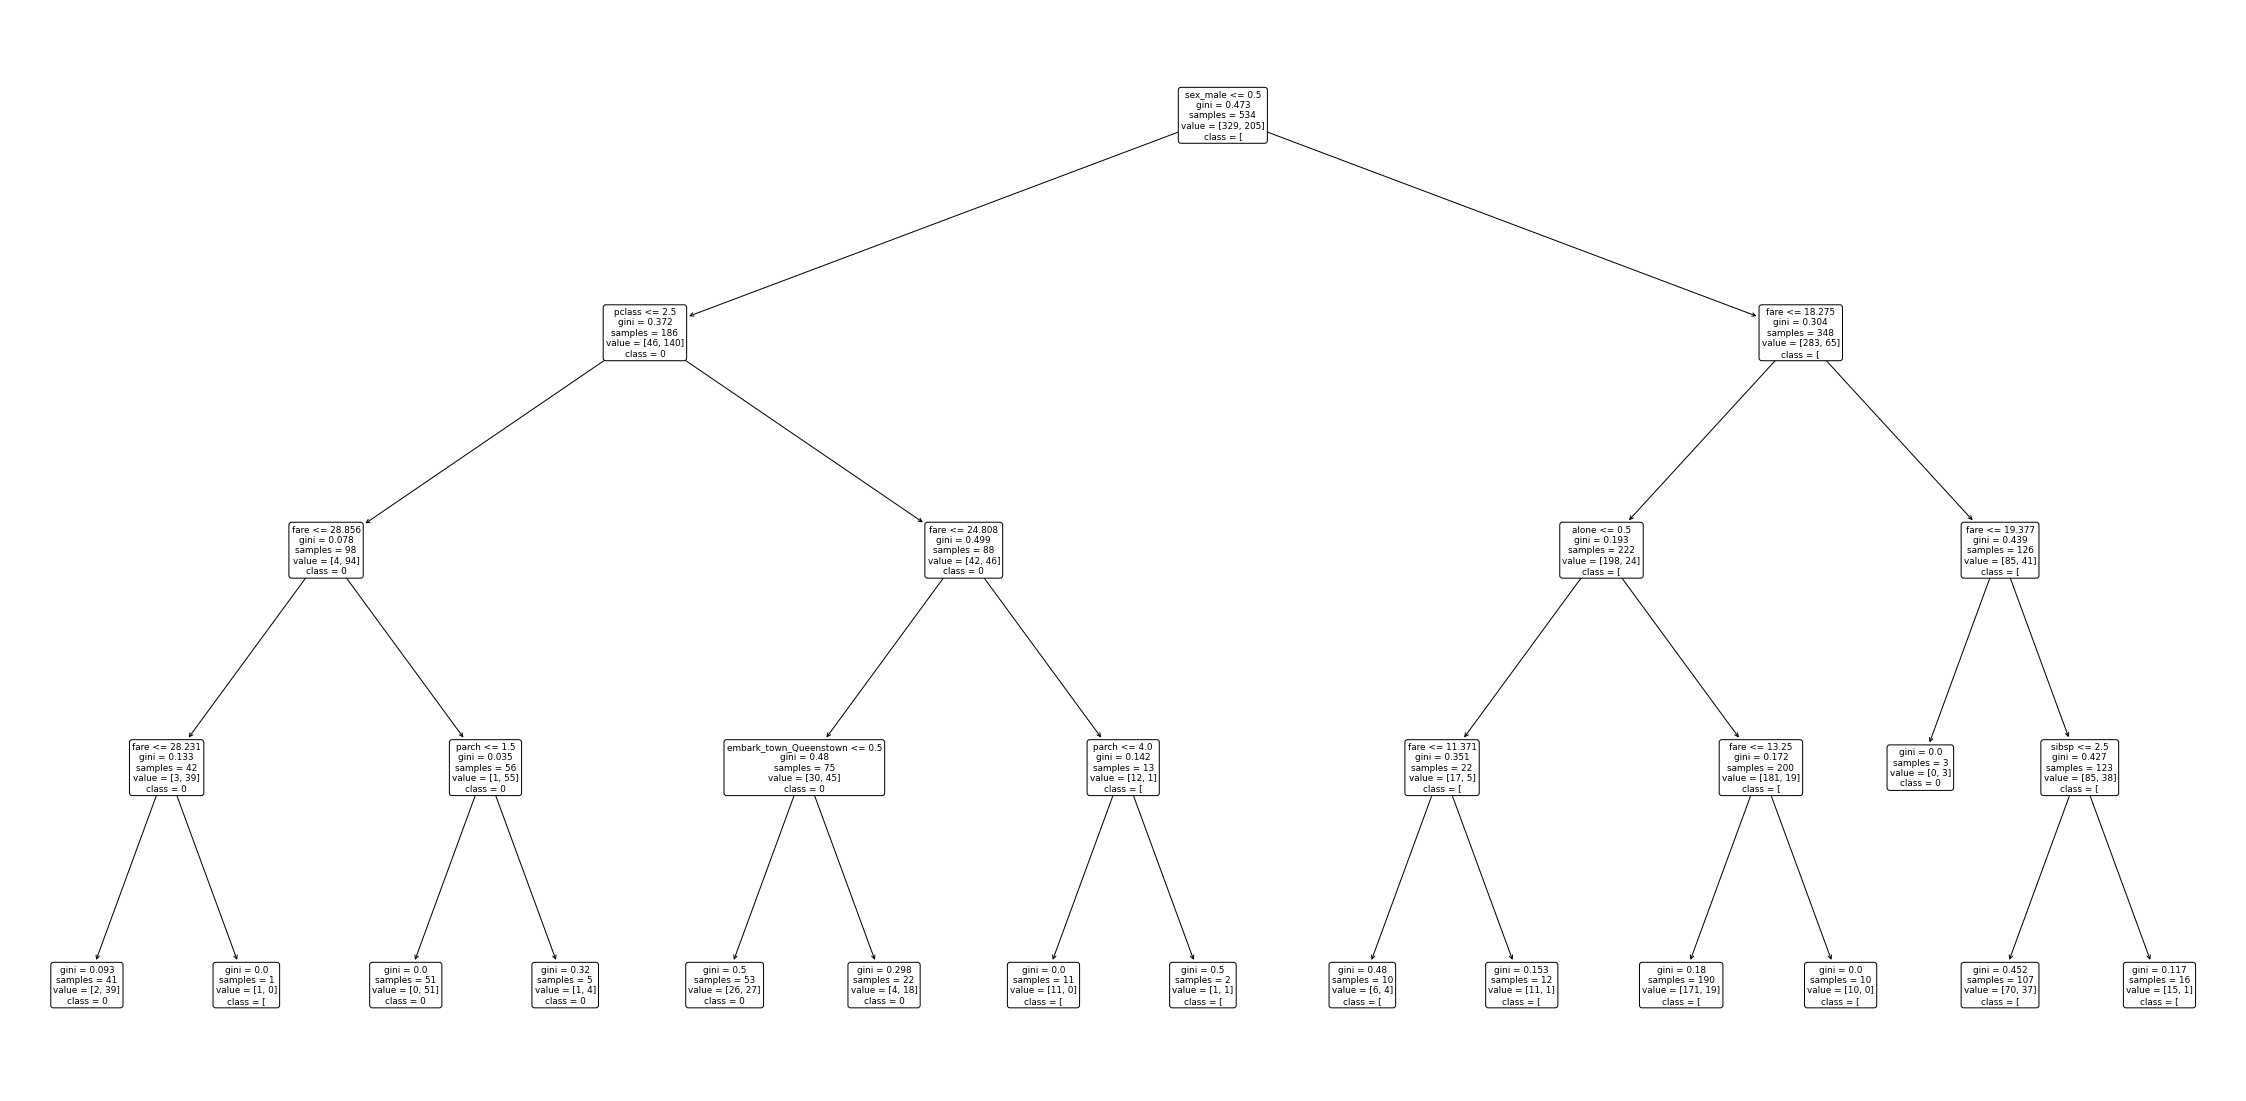

Accuracy of Decision Tree classifier(gini / 4) on training set:  0.82
        0       1
0  TN:296   FP:33
1   FN:63  TP:142
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.80      0.80       534
weighted avg       0.82      0.82      0.82       534
 ---------------4 depth set---------------
0.82 <--accuracy 0.693 <--True positive rate 0.1 <--false positive rate/recall 0.9 <--true negative rate 0.307 <--false negative rate 0.811 <--precision 0.747 <--f1_score 205 329 <--support pos, support neg

 
 
 
 

Accuracy of Decision Tree classifier (depth 4) on validate set:  0.79
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.75      0.68      0.71        68

    accuracy                           0.79       178
  

In [383]:
give_it_a_go(X_train,y_train,X_validate,y_validate,4)

-
-
-
-
-
-
-
-
-
-

Work through these same exercises using the Telco dataset.
Experiment with this model on other datasets with a higher number of output classes.

In [384]:
telco_df = prepare.prep_telco()
telco_df.total_charges.replace({" ":0,"":0},inplace=True)
telco_df.total_charges = telco_df.total_charges.astype(float)
prediction_col = "churn_encoded"

train_df,test_df,validate_df = prepare.split_function(telco_df,prediction_col)

baseline_predict = train_df[prediction_col].mode()[0]
(train_df[prediction_col] == baseline_predict).mean()

print(f"{baseline_predict} <--- mode of survived in training data / baseline prediction")
print(f"{(train_df[prediction_col] == baseline_predict).mean() * 100 :.2f}% <--- accuracy of baseline prediciton in training data")


prepared df shape: (7043, 31)
train shape: (4225, 31)
validate shape: (1409, 31)
test shape: (1409, 31)
0 <--- mode of survived in training data / baseline prediction
73.47% <--- accuracy of baseline prediciton in training data


In [385]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         4225 non-null   int64  
 1   tenure                                 4225 non-null   int64  
 2   monthly_charges                        4225 non-null   float64
 3   total_charges                          4225 non-null   float64
 4   gender_encoded                         4225 non-null   int64  
 5   partner_encoded                        4225 non-null   int64  
 6   dependents_encoded                     4225 non-null   int64  
 7   phone_service_encoded                  4225 non-null   int64  
 8   paperless_billing_encoded              4225 non-null   int64  
 9   churn_encoded                          4225 non-null   int64  
 10  multiple_lines_No phone service        4225 non-null   uint8  
 11  m

In [386]:
X_train = train_df.drop(columns = [prediction_col])
y_train = train_df[prediction_col]

X_validate = validate_df.drop(columns = [prediction_col])
y_validate = validate_df[prediction_col]

X_test = test_df.drop(columns = [prediction_col])
y_test = test_df[prediction_col]

In [387]:
clf_gini0 = DecisionTreeClassifier(random_state= 123, criterion="gini")
clf_gini0 = clf_gini0.fit(X_train,y_train)
#clf_gini0.classes_ = str(clf_gini0.classes_)

clf_gini1 = DecisionTreeClassifier(max_depth= 1,random_state= 123, criterion="gini")
clf_gini1 = clf_gini1.fit(X_train,y_train)
#clf_gini1.classes_ = str(clf_gini1.classes_)
#plt.figure(figsize=(20,10))
#plot_tree(clf_gini1, feature_names=X_train.columns, class_names=clf_gini1.classes_, rounded=True)

clf_gini3 = DecisionTreeClassifier(max_depth= 3, random_state= 123, criterion="gini")
clf_gini3 = clf_gini3.fit(X_train,y_train)
#clf_gini3.classes_ = str(clf_gini3.classes_)
#plt.figure(figsize=(20,10))
#plot_tree(clf_gini3, feature_names=X_train.columns, class_names=clf_gini3.classes_, rounded=True)

clf_gini5 = DecisionTreeClassifier(max_depth= 5,random_state= 123, criterion="gini")
clf_gini5 = clf_gini5.fit(X_train,y_train)

clf_gini10 = DecisionTreeClassifier(max_depth= 10,random_state= 123, criterion="gini")
clf_gini10 = clf_gini10.fit(X_train,y_train)

plt.show()

In [388]:
y_pred_gini0 = clf_gini0.predict(X_train)
y_pred_proba_gini0 = clf_gini0.predict_proba(X_train)
print(y_pred_proba_gini0[0:5],"gini0")
y_pred_gini1 = clf_gini1.predict(X_train)
y_pred_proba_gini1 = clf_gini1.predict_proba(X_train)
print(y_pred_proba_gini1[0:5],"gini1")
y_pred_gini3 = clf_gini3.predict(X_train)
y_pred_proba_gini3 = clf_gini3.predict_proba(X_train)
print(y_pred_proba_gini3[0:5],"gini3")
y_pred_gini5 = clf_gini5.predict(X_train)
y_pred_proba_gini5 = clf_gini5.predict_proba(X_train)
print(y_pred_proba_gini5[0:5],"gini5")
y_pred_gini10 = clf_gini10.predict(X_train)
y_pred_proba_gini10 = clf_gini10.predict_proba(X_train)
print(y_pred_proba_gini10[0:10],"gini10")

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]] gini0
[[0.83953319 0.16046681]
 [0.83953319 0.16046681]
 [0.54079568 0.45920432]
 [0.83953319 0.16046681]
 [0.83953319 0.16046681]] gini1
[[0.90279465 0.09720535]
 [0.90279465 0.09720535]
 [0.55027933 0.44972067]
 [0.98548621 0.01451379]
 [0.61388889 0.38611111]] gini3
[[0.96463023 0.03536977]
 [0.96463023 0.03536977]
 [0.39156627 0.60843373]
 [0.99169435 0.00830565]
 [0.84375    0.15625   ]] gini5
[[1.         0.        ]
 [0.91666667 0.08333333]
 [0.24137931 0.75862069]
 [1.         0.        ]
 [0.9        0.1       ]
 [1.         0.        ]
 [0.125      0.875     ]
 [0.025      0.975     ]
 [0.92857143 0.07142857]
 [0.         1.        ]] gini10


In [389]:
labels = sorted(y_train.unique())

gini0_confusion = pd.DataFrame(confusion_matrix(y_train,y_pred_gini0),
                                index=labels,
                                columns=labels
                                )
TN0, FP0, FN0, TP0 = confusion_matrix(y_train,y_pred_gini0).ravel()
print(gini0_confusion)
print("^^^0^^^")

gini1_confusion = pd.DataFrame(confusion_matrix(y_train,y_pred_gini1),
                                index=labels,
                                columns=labels
                                )
TN1, FP1, FN1, TP1 = confusion_matrix(y_train,y_pred_gini1).ravel()
print(gini1_confusion)
print("^^^1^^^")

gini3_confusion = pd.DataFrame(confusion_matrix(y_train,y_pred_gini3),
                                index=labels,
                                columns=labels
                                )
TN3, FP3, FN3, TP3 = confusion_matrix(y_train,y_pred_gini3).ravel()
print(gini3_confusion)
print("^^^3^^^")

gini5_confusion = pd.DataFrame(confusion_matrix(y_train,y_pred_gini5),
                                index=labels,
                                columns=labels
                                )
TN5, FP5, FN5, TP5 = confusion_matrix(y_train,y_pred_gini5).ravel()
print(gini5_confusion)
print("^^^5^^^")

gini10_confusion = pd.DataFrame(confusion_matrix(y_train,y_pred_gini10),
                                index=labels,
                                columns=labels
                                )
TN10, FP10, FN10, TP10 = confusion_matrix(y_train,y_pred_gini10).ravel()
print(gini10_confusion)
print("^^^10^^^")

      0     1
0  3103     1
1     7  1114
^^^0^^^
      0  1
0  3104  0
1  1121  0
^^^1^^^
      0    1
0  2902  202
1   698  423
^^^3^^^
      0    1
0  2752  352
1   481  640
^^^5^^^
      0    1
0  2932  172
1   316  805
^^^10^^^


In [390]:
#Remember that Accuracy is the number of correct predictions 
# over the number of total instances that have been evaluated.
print('Accuracy of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(clf_gini0.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(clf_gini1.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(clf_gini3.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(clf_gini5.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier(gini / depth - 10) on training set: {:.2f}'
      .format(clf_gini10.score(X_train, y_train)))


Accuracy of Decision Tree classifier(gini / no depth) on training set: 1.00
Accuracy of Decision Tree classifier(gini / depth - 1) on training set: 0.73
Accuracy of Decision Tree classifier(gini / depth - 3) on training set: 0.79
Accuracy of Decision Tree classifier(gini / depth - 5) on training set: 0.80
Accuracy of Decision Tree classifier(gini / depth - 10) on training set: 0.88


In [391]:
print(classification_report(y_train,y_pred_gini0), "---------------no depth set---------------")

print(classification_report(y_train,y_pred_gini1), "---------------1 depth---------------")

print(classification_report(y_train,y_pred_gini3), "---------------3 depth---------------")

print(classification_report(y_train,y_pred_gini5), "---------------5 depth---------------")

print(classification_report(y_train,y_pred_gini10), "---------------10 depth---------------")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3104
           1       1.00      0.99      1.00      1121

    accuracy                           1.00      4225
   macro avg       1.00      1.00      1.00      4225
weighted avg       1.00      1.00      1.00      4225
 ---------------no depth set---------------
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3104
           1       0.00      0.00      0.00      1121

    accuracy                           0.73      4225
   macro avg       0.37      0.50      0.42      4225
weighted avg       0.54      0.73      0.62      4225
 ---------------1 depth---------------
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3104
           1       0.68      0.38      0.48      1121

    accuracy                           0.79      4225
   macro avg       0.74      0.66      0.68    

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


i'm seeing a trend where the more depth you add in the training the more accurate it will be (of course), however this does not help when moving into a different set of data (overfitting), so i'm not sure how to evaluate early how the models perform

can drop depth of 1 due to falling below baseline metric

In [392]:
print('Accuracy of Decision Tree classifier (gini0) on validate set: {:.2f}'
     .format(clf_gini0.score(X_validate, y_validate)))
print('Accuracy of Decision Tree classifier (gini3) on validate set: {:.2f}'
     .format(clf_gini3.score(X_validate, y_validate)))
print('Accuracy of Decision Tree classifier (gini5) on validate set: {:.2f}'
     .format(clf_gini5.score(X_validate, y_validate)))
print('Accuracy of Decision Tree classifier (gini10) on validate set: {:.2f}'
     .format(clf_gini10.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier (gini0) on validate set: 0.73
Accuracy of Decision Tree classifier (gini3) on validate set: 0.79
Accuracy of Decision Tree classifier (gini5) on validate set: 0.79
Accuracy of Decision Tree classifier (gini10) on validate set: 0.76


In [393]:
# Produce y_predictions that come from the X_validate
y_pred_gini0_val = clf_gini0.predict(X_validate)
# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred_gini0_val))
print("^^^^ depth of all ^^^^")
y_pred_gini3_val = clf_gini3.predict(X_validate)
print(classification_report(y_validate, y_pred_gini3_val))
print("^^^^ depth of 3 ^^^^")
y_pred_gini5_val = clf_gini5.predict(X_validate)
print(classification_report(y_validate, y_pred_gini5_val))
print("^^^^ depth of 5 ^^^^")
y_pred_gini10_val = clf_gini10.predict(X_validate)
print(classification_report(y_validate, y_pred_gini10_val))
print("^^^^ depth of 10 ^^^^")

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1035
           1       0.48      0.51      0.49       374

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409

^^^^ depth of all ^^^^
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1035
           1       0.70      0.39      0.50       374

    accuracy                           0.79      1409
   macro avg       0.75      0.66      0.68      1409
weighted avg       0.78      0.79      0.77      1409

^^^^ depth of 3 ^^^^
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.62      0.57      0.60       374

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0

looks like the overfit data matches up with the mode/baseline on accuracy

accuracy : depth of 3 and 5 @ .79

recall on death: depth of 3 @ .94

recall on survived: depth of 5 @ .57

precision on death: depth of 5 @ .85

precision on survived: depth of 3 @ .78

weighted avg f1: depth of 5 @ .79

depending on what we are looking for, i would use model 3 ((recall on depth/precision on survived) good for as many real death as possible (control for false negative)) or model 5 ((precision on death/recall on survived) as many predicited death to be as correct as possible (control for false positive))

In [394]:
give_it_a_go(X_train,y_train,X_validate,y_validate,4)

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

In [ ]:

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns


from pydataset import data

In [ ]:
def ran_forest_func(X_train, y_train, X_validate, y_validate, depth, leafs): 
     rf = RandomForestClassifier(bootstrap=True,
                              class_weight=None,
                              criterion="gini",
                              min_samples_leaf=leafs,
                              n_estimators=100,
                              max_depth=depth,
                              random_state=123
                              )

     rf.fit(X_train,y_train)
     #print(rf.feature_importances_) #weight of each feature

     y_pred = rf.predict(X_train)
     y_pred_proba = rf.predict_proba(X_train)

     #print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf.score(X_train, y_train)))
     #print(confusion_matrix(y_train, y_pred))

     TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()

     all = TP + FP + FN + TN
     acc = (TP + TN)/all
     TPR = recall = TP / (TP+FN)
     FPR = FP / (FP+TN)
     TNR = (TN / ( TN + FP ))
     FNR = FN / (FN + TP)
     precision = TP / (TP + FP)
     f1_score = 2*(precision*recall)/(precision+recall)
     support_pos = TP+FN
     support_neg = (FP + TN)
     #print(round(acc,3),"<--accuracy", \
     #     round(TPR,3),"<--True positive rate", \
     #     round(FPR,3), "<--false positive rate/recall", \
     #     round(TNR,3), "<--true negative rate", \
     #     round(FNR,3), "<--false negative rate", \
     #     round(precision,3), "<--precision", \
     #     round(f1_score,3),"<--f1_score", \
     #     round(support_pos,3),round(support_neg,3),"<--support pos, support neg")


     #print(classification_report(y_train, y_pred))

     #print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_validate, y_validate)))

     #pd.Series(rf.feature_importances_, index=X_train.columns).nlargest(20).plot(kind='barh')

     return(depth,leafs,acc,TPR,FPR,TNR,FNR,precision,f1_score,support_neg,support_pos,rf.score(X_validate, y_validate))

In [ ]:
df_returned = pd.DataFrame(columns = ["depth", "leafs","acc","TPR/recall","FPR","TNR","FNR","precision","f1_score","support_neg","support_pos","acc_val"])
for i in range(1,11): #not duing 1 because it creates nulls anyways
    for j in range(10, 0,-1):
        df_returned.loc[df_returned.shape[0]] = (ran_forest_func(X_train,y_train,X_validate,y_validate,i,j))
df_returned.head(),df_returned.tail()

/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_44684/1124592802.py:28: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)
/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_44684/1124592802.py:28: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)
/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_44684/1124592802.py:28: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)
/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_44684/1124592802.py:28: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)
/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_44684/1124592802.py:28: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)
/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_44684/1124592802.py:28: RuntimeWarning: invalid value encountered in long_scalars
  precisi

(   depth  leafs       acc  TPR/recall  FPR  TNR  FNR  precision  f1_score  \
 0    1.0   10.0  0.734675         0.0  0.0  1.0  1.0        NaN       NaN   
 1    1.0    9.0  0.734675         0.0  0.0  1.0  1.0        NaN       NaN   
 2    1.0    8.0  0.734675         0.0  0.0  1.0  1.0        NaN       NaN   
 3    1.0    7.0  0.734675         0.0  0.0  1.0  1.0        NaN       NaN   
 4    1.0    6.0  0.734675         0.0  0.0  1.0  1.0        NaN       NaN   
 
    support_neg  support_pos   acc_val  
 0       3104.0       1121.0  0.734564  
 1       3104.0       1121.0  0.734564  
 2       3104.0       1121.0  0.734564  
 3       3104.0       1121.0  0.734564  
 4       3104.0       1121.0  0.734564  ,
     depth  leafs       acc  TPR/recall       FPR       TNR       FNR  \
 95   10.0    5.0  0.843550    0.584300  0.062822  0.937178  0.415700   
 96   10.0    4.0  0.851124    0.603033  0.059278  0.940722  0.396967   
 97   10.0    3.0  0.854201    0.608385  0.057023  0.942977  0.3

In [ ]:
df_returned.dropna(inplace=True)

print([(str(round(df_returned[col].max(),3)) + " " + df_returned[col].name) for col in df_returned.columns])
df_returned.idxmax()

['10.0 depth', '10.0 leafs', '0.881 acc', '0.677 TPR/recall', '0.077 FPR', '0.989 TNR', '0.872 FNR', '0.843 precision', '0.751 f1_score', '3104.0 support_neg', '1121.0 support_pos', '0.813 acc_val']


depth          80
leafs           0
acc            89
TPR/recall     89
FPR            55
TNR             0
FNR             0
precision      89
f1_score       89
support_neg     0
support_pos     0
acc_val        55
dtype: int64